## LINEAR REGRESSION - BIKE SHARING ASSINGMENT
[1] Fanaee-T, Hadi, and Gama, Joao, "Event labeling combining ensemble detectors and background knowledge", Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg, doi:10.1007/s13748-013-0040-3.

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read CSV file
day = pd.read_csv("day.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Checking the shape
day.shape

(730, 16)

In [4]:
# Checking the info
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Dropping columns from the 'day'

# instant: unique row value 
# dteday: data already captured
# temp: would have high correlation with atemp
# casual & registered: acting as target variable & will not be available for making predictions

day = day.drop(['instant', 'dteday', 'temp','casual', 'registered'], axis = 1)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


In [7]:
# get unique column values
day.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [8]:
day.weathersit.unique()

array([2, 1, 3], dtype=int64)

In [9]:
# Mapping Columns to Categories

# mapping 'season'
season_category_dict = {1:"Spring", 2:"Summer", 3:"Fall", 4:"Winter"}
day['season_category'] = day['season'].map(season_category_dict)

# mapping 'mnth'
mnth_category_dict = {1: "January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July", 8:"August", 9:"September", 10:"October", 11: "November", 12:"December"}
day["mnth_category"] = day['mnth'].map(mnth_category_dict)

# mapping 'weekday'
weekday_category_dict = {0:"Sunday", 1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 6:"Saturday"}
day["weekday_category"] = day['weekday'].map(weekday_category_dict)

# mapping 'weathersit'
weathersit_category_dict = {1:"Clear", 2:"Mist & Cloudy", 3: "Light Snow Rain", 4: "Heavy Snow Rain"}
day['weathersit_category'] = day['weathersit'].map(weathersit_category_dict)

day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,season_category,mnth_category,weekday_category,weathersit_category
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985,Spring,January,Saturday,Mist & Cloudy
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801,Spring,January,Sunday,Mist & Cloudy
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349,Spring,January,Monday,Clear
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562,Spring,January,Tuesday,Clear
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600,Spring,January,Wednesday,Clear


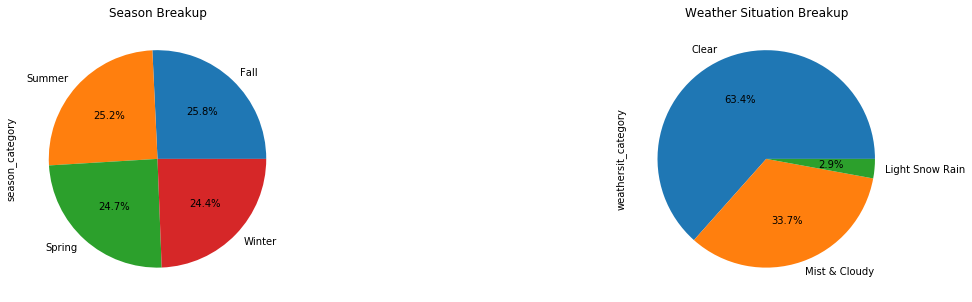

In [10]:
# plotting season & weather pie chart

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title("Season Breakup")
day["season_category"].value_counts(normalize=True).plot(kind="pie",autopct='%1.1f%%')

plt.subplot(1,2,2)
plt.title("Weather Situation Breakup")
day["weathersit_category"].value_counts(normalize=True).plot(kind="pie",autopct='%1.1f%%')
plt.show()

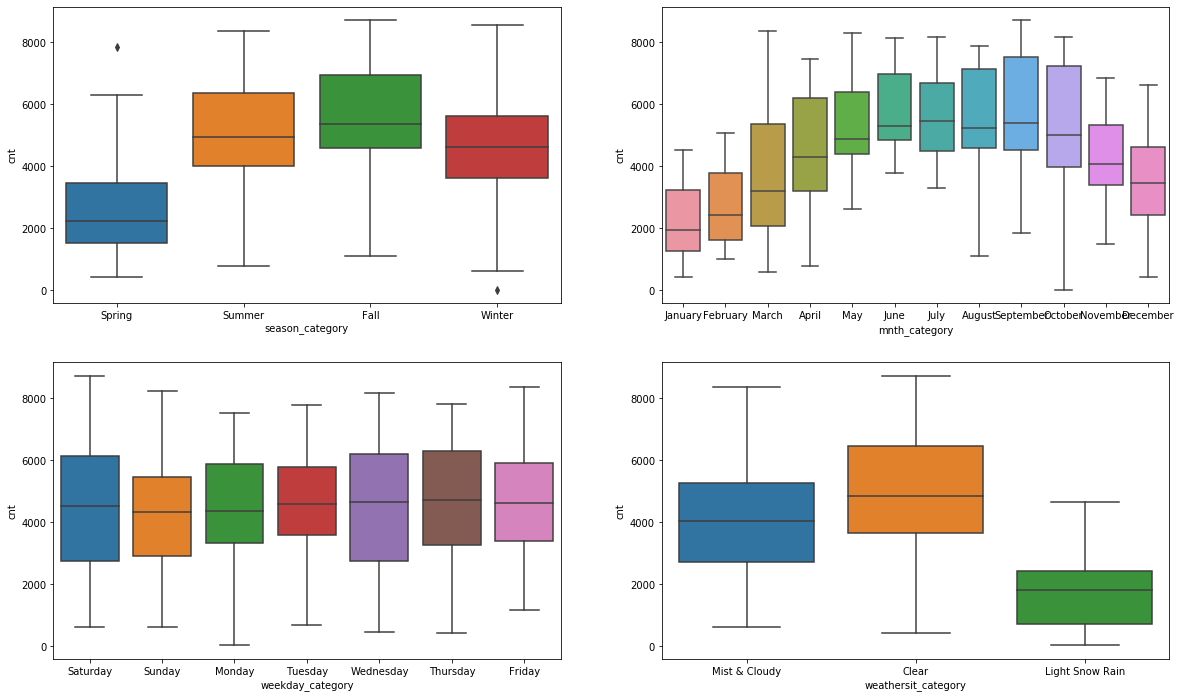

In [11]:
# Boxplotting 
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'season_category', y = 'cnt', data = day)
plt.subplot(2,2,2)
sns.boxplot(x = 'mnth_category', y = 'cnt', data = day)
plt.subplot(2,2,3)
sns.boxplot(x = 'weekday_category', y = 'cnt', data = day)
plt.subplot(2,2,4)
sns.boxplot(x = 'weathersit_category', y = 'cnt', data = day)
plt.show()

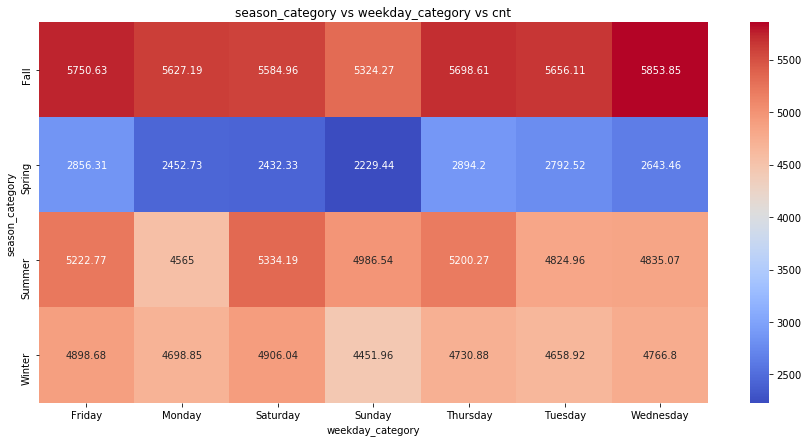

In [12]:
# plotting heatmaps
plt.figure(figsize = [15,7])
df1_heatmap = pd.pivot_table(data = day, index = "season_category", columns = "weekday_category", values = "cnt")
sns.heatmap(df1_heatmap, annot = True, cmap = "coolwarm",fmt='g').set_title("season_category vs weekday_category vs cnt")
plt.show()

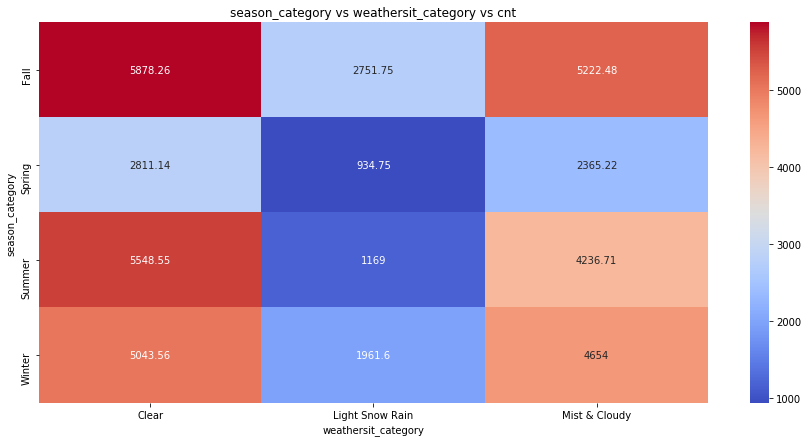

In [13]:
plt.figure(figsize = [15,7])
df1_heatmap = pd.pivot_table(data = day, index = "season_category", columns = "weathersit_category", values = "cnt")
sns.heatmap(df1_heatmap, annot = True, cmap = "coolwarm",fmt='g').set_title("season_category vs weathersit_category vs cnt")
plt.show()

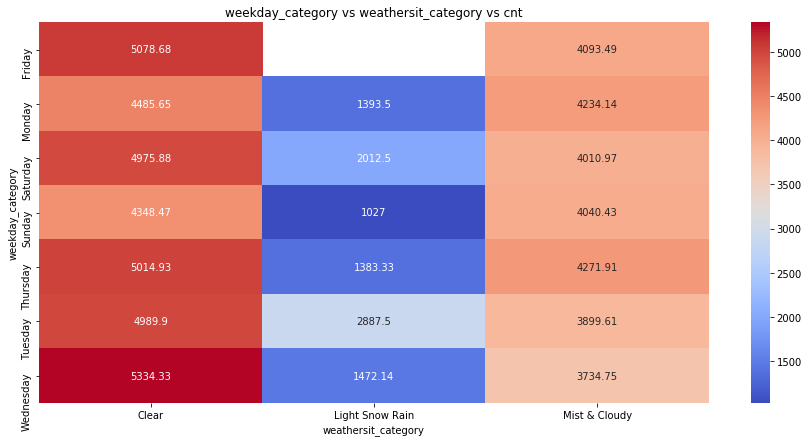

In [14]:
plt.figure(figsize = [15,7])
df1_heatmap = pd.pivot_table(data = day, index = "weekday_category", columns = "weathersit_category", values = "cnt")
sns.heatmap(df1_heatmap, annot = True, cmap = "coolwarm",fmt='g').set_title("weekday_category vs weathersit_category vs cnt")
plt.show()

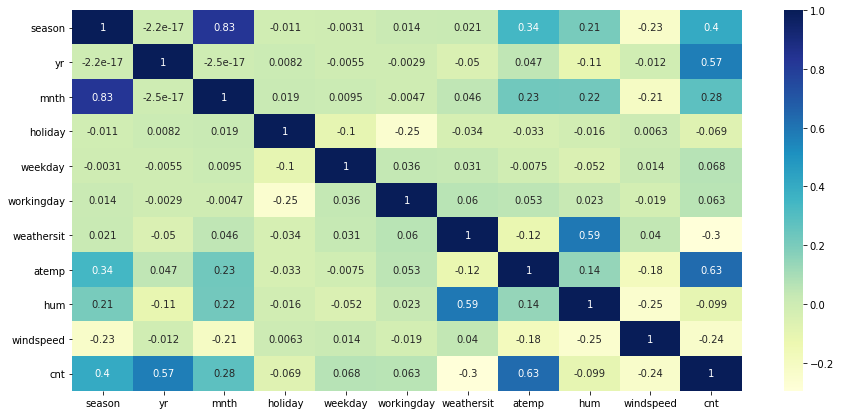

In [15]:
# checking for correlation 
plt.figure(figsize = [15,7])
sns.heatmap(day.corr(), cmap="YlGnBu", annot = True)
plt.show()

- 'atemp' seems to express the highest correlation with 'cnt'
- people are more likely to opt for bikes when the weather situation is 'clear', medium likely when 'mist & cloudy' & less likely on 'light snow rain'


<Figure size 2880x3240 with 0 Axes>

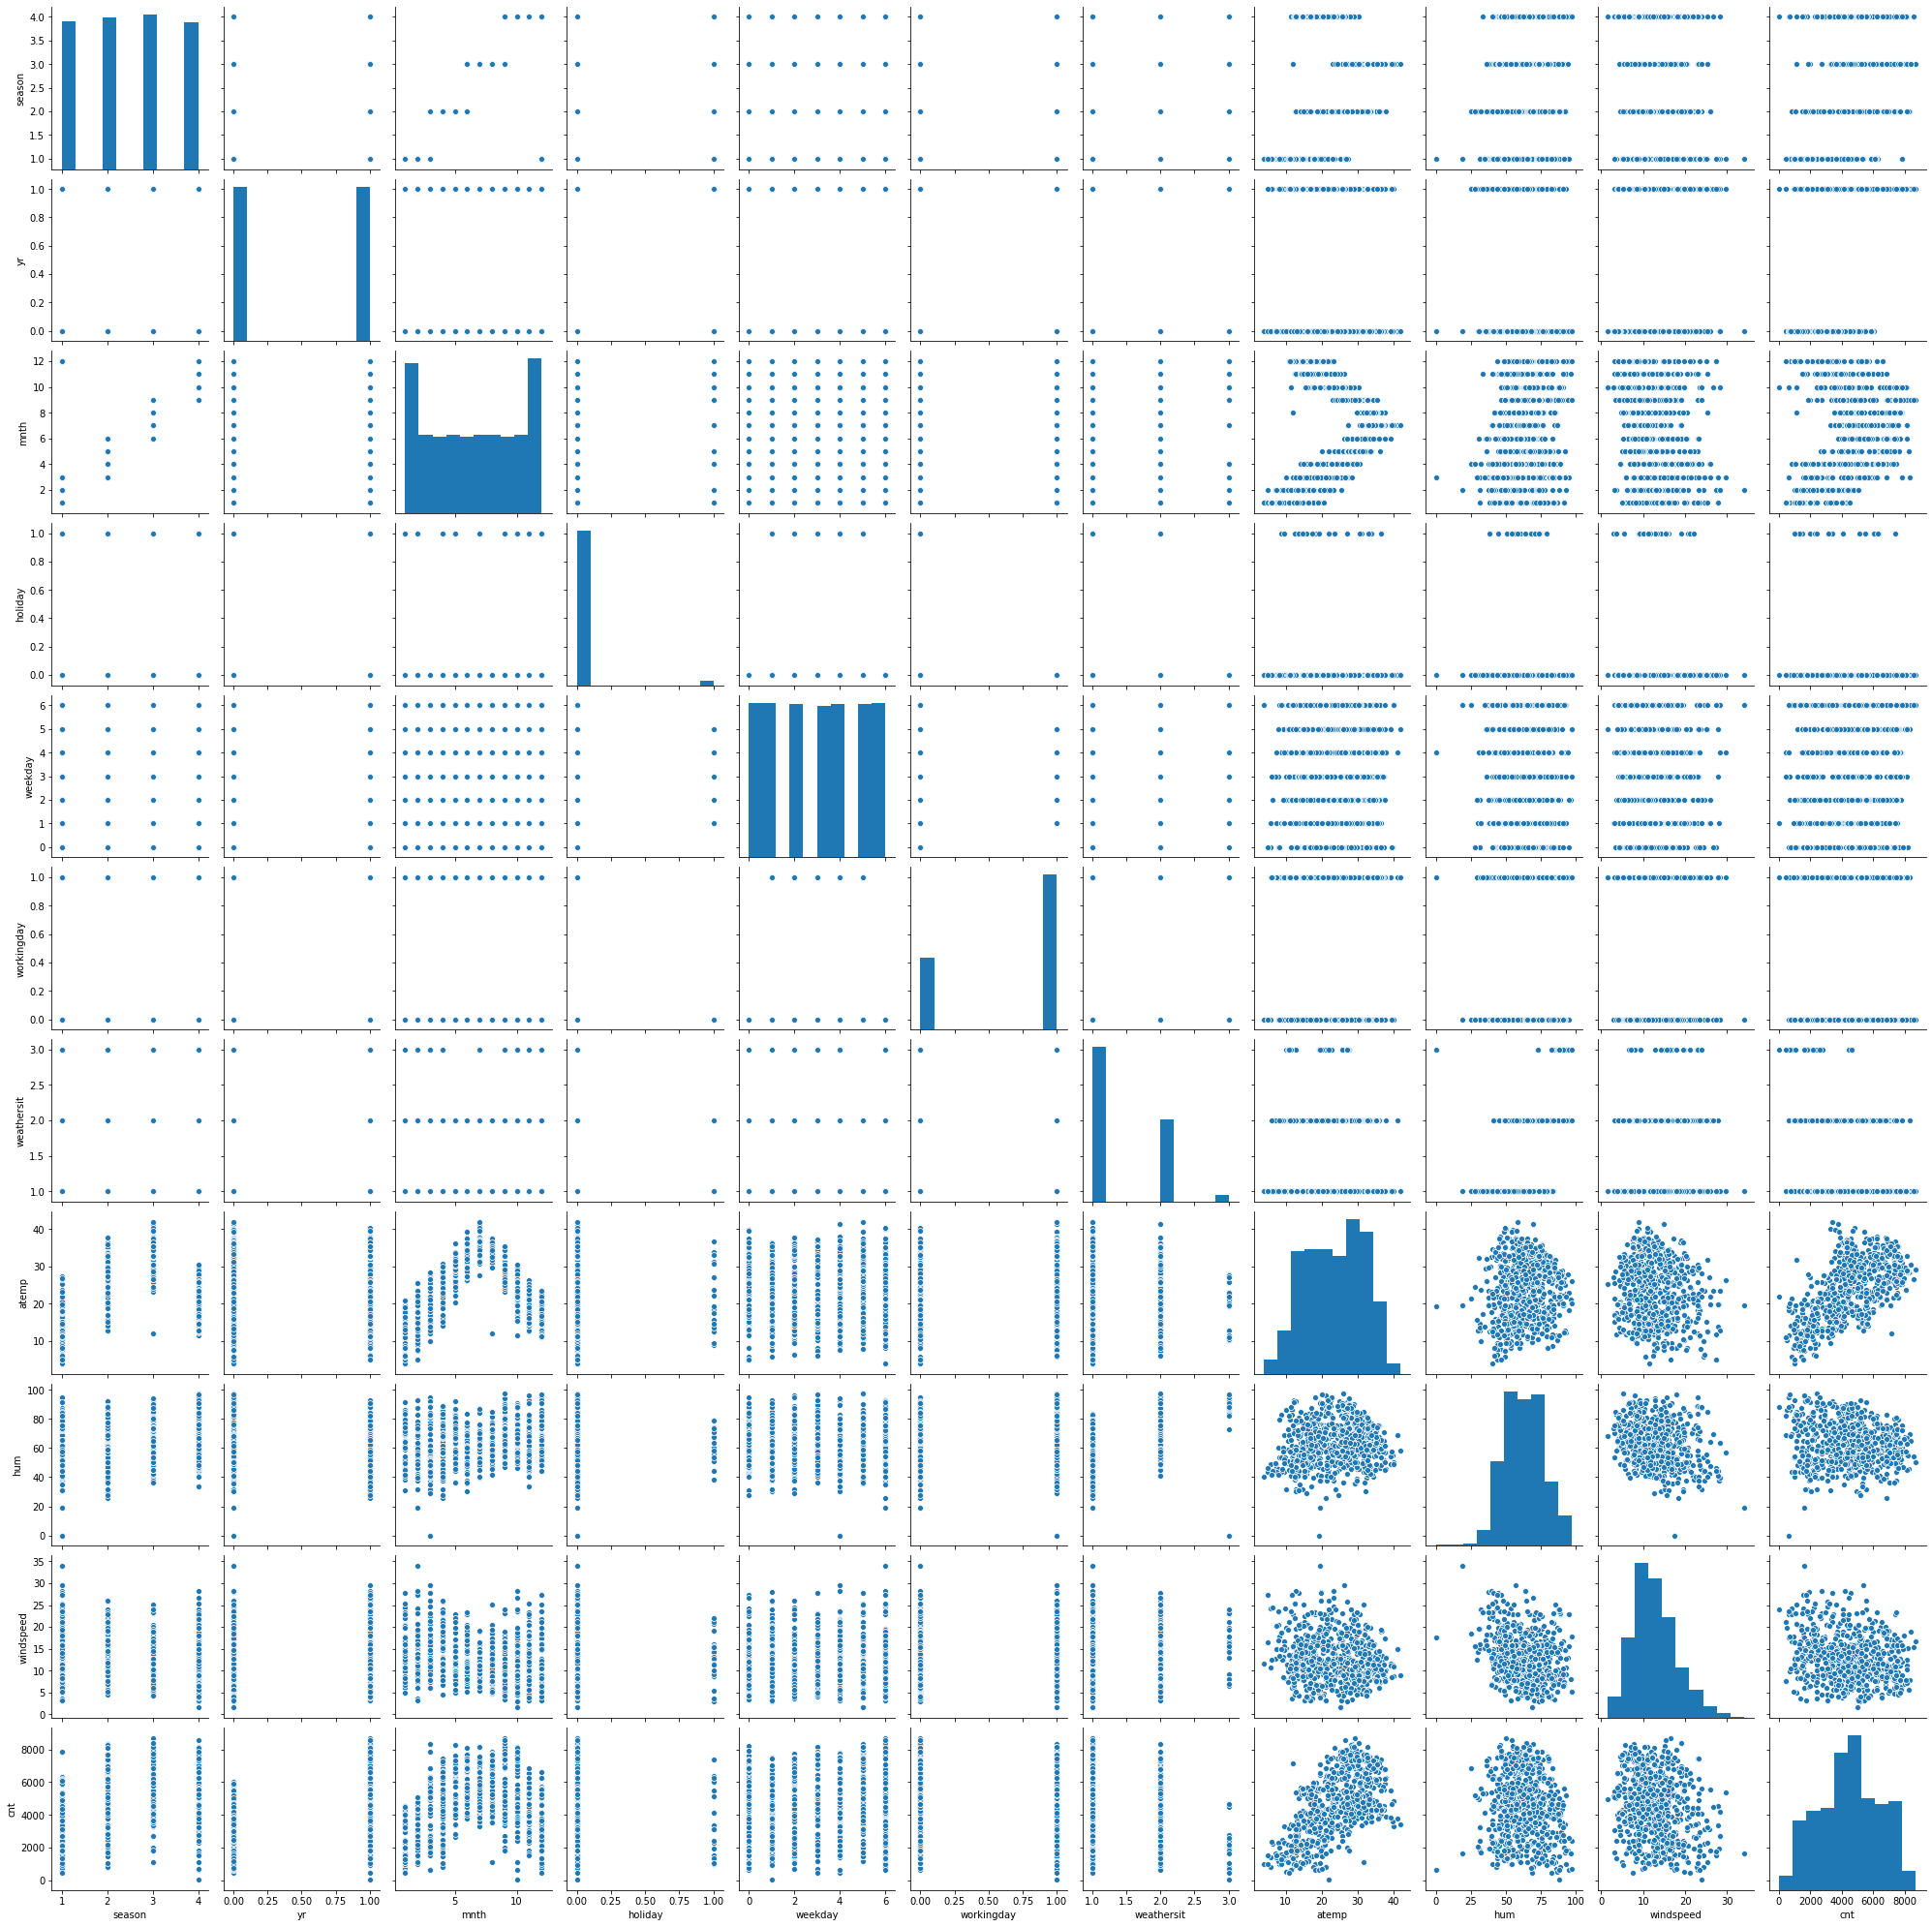

In [16]:
plt.figure(figsize = [40,45])
sns.pairplot(day)
plt.show()

In [17]:
# get dummies: 'season'
season = pd.get_dummies(day['season_category'])
season

,Fall,Spring,Summer,Winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
725,0,1,0,0
726,0,1,0,0
727,0,1,0,0
728,0,1,0,0


In [18]:
# get dummies: month
month = pd.get_dummies(day['mnth_category'])
month

,April,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
725,0,0,1,0,0,0,0,0,0,0,0,0
726,0,0,1,0,0,0,0,0,0,0,0,0
727,0,0,1,0,0,0,0,0,0,0,0,0
728,0,0,1,0,0,0,0,0,0,0,0,0


In [19]:
# get dummies: weekday
weekday = pd.get_dummies(day['weekday_category'])
weekday

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
725,0,0,0,0,1,0,0
726,1,0,0,0,0,0,0
727,0,0,1,0,0,0,0
728,0,0,0,1,0,0,0


In [20]:
# get dummies: weather
weather = pd.get_dummies(day['weathersit_category'])
weather

,Clear,Light Snow Rain,Mist & Cloudy
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,0,0,1
726,0,0,1
727,0,0,1
728,1,0,0


In [21]:
# Concat 
day = pd.concat([day, month, weekday, weather, season], axis = 1)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,Thursday,Tuesday,Wednesday,Clear,Light Snow Rain,Mist & Cloudy,Fall,Spring,Summer,Winter
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,...,0,0,0,0,0,1,0,1,0,0
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,...,0,0,0,0,0,1,0,1,0,0
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,...,0,0,0,1,0,0,0,1,0,0
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,...,0,1,0,1,0,0,0,1,0,0
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,...,0,0,1,1,0,0,0,1,0,0


In [22]:
# dropping original columns that were categorized 
day = day.drop(['season', 'weathersit', 'mnth', 'weekday'], axis = 1)
day.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_category,mnth_category,weekday_category,...,Thursday,Tuesday,Wednesday,Clear,Light Snow Rain,Mist & Cloudy,Fall,Spring,Summer,Winter
0,0,0,0,18.18125,80.5833,10.749882,985,Spring,January,Saturday,...,0,0,0,0,0,1,0,1,0,0
1,0,0,0,17.68695,69.6087,16.652113,801,Spring,January,Sunday,...,0,0,0,0,0,1,0,1,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,Spring,January,Monday,...,0,0,0,1,0,0,0,1,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,Spring,January,Tuesday,...,0,1,0,1,0,0,0,1,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,Spring,January,Wednesday,...,0,0,1,1,0,0,0,1,0,0


In [23]:
# dropping original columns that were categorized 
day = day.drop(['season_category', 'weathersit_category', 'mnth_category', 'weekday_category'], axis = 1)
day.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,April,August,December,...,Thursday,Tuesday,Wednesday,Clear,Light Snow Rain,Mist & Cloudy,Fall,Spring,Summer,Winter
0,0,0,0,18.18125,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,0,0,17.68695,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,0,0,0,...,0,1,0,1,0,0,0,1,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,0,0,0,...,0,0,1,1,0,0,0,1,0,0


In [24]:
# split data into training and test set
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(day, train_size = 0.7, test_size = 0.3, random_state = 100)

In [25]:
# applying MinMaxScaler on numeric variables: expect yes/no-type & dummy variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_var = ['atemp', 'hum', 'windspeed', 'cnt']
df_train[num_var] = scaler.fit_transform(df_train[num_var])

df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,April,August,December,...,Thursday,Tuesday,Wednesday,Clear,Light Snow Rain,Mist & Cloudy,Fall,Spring,Summer,Winter
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,0,...,0,1,0,1,0,0,0,0,0,1
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,1,0,1,0,0,1,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,0,0,0,...,0,0,0,0,0,1,0,1,0,0
728,1,0,0,0.200348,0.498067,0.663106,0.204096,0,0,1,...,0,0,0,1,0,0,0,1,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [26]:
# dividing data into X and y

y_train = df_train.pop('cnt')
X_train = df_train

In [27]:
# importing RFE & LinearRegression()

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [28]:
# executing RFE(recursive feature elimination) with the output number of the variable equal to 15 (as suggested)

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [29]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('April', False, 15),
 ('August', False, 8),
 ('December', True, 1),
 ('February', False, 4),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 9),
 ('March', False, 16),
 ('May', False, 5),
 ('November', True, 1),
 ('October', False, 14),
 ('September', True, 1),
 ('Friday', False, 12),
 ('Monday', False, 10),
 ('Saturday', True, 1),
 ('Sunday', False, 6),
 ('Thursday', False, 17),
 ('Tuesday', False, 11),
 ('Wednesday', False, 18),
 ('Clear', True, 1),
 ('Light Snow Rain', True, 1),
 ('Mist & Cloudy', False, 3),
 ('Fall', False, 7),
 ('Spring', True, 1),
 ('Summer', False, 13),
 ('Winter', True, 1)]

In [30]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'December', 'January',
       'July', 'November', 'September', 'Saturday', 'Clear', 'Light Snow Rain',
       'Spring', 'Winter'],
      dtype='object')

In [31]:
X_train.columns[~rfe.support_]

Index(['workingday', 'April', 'August', 'February', 'June', 'March', 'May',
       'October', 'Friday', 'Monday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Mist & Cloudy', 'Fall', 'Summer'],
      dtype='object')

In [32]:
# from RFE selected vars, create X_test df
X_train_rfe = X_train[col]

In [33]:
# adding constatnt
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [34]:
# run linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [35]:
# printing the summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.4
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          9.67e-187
Time:                        11:35:45   Log-Likelihood:                 508.84
No. Observations:                 510   AIC:                            -985.7
Df Residuals:                     494   BIC:                            -917.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3079      0.036     

In [36]:
# dropping 'Saturday' - insignificant 
X_train_new = X_train_rfe.drop(["Saturday"], axis = 1)

In [37]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [38]:
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   

In [39]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.1
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          2.58e-187
Time:                        11:35:45   Log-Likelihood:                 507.48
No. Observations:                 510   AIC:                            -985.0
Df Residuals:                     495   BIC:                            -921.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3128      0.036     

In [40]:
# dropping 'Winter' - insignificant 
X_train_new = X_train_new.drop(["Winter"], axis = 1)

In [41]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [42]:
lm = sm.OLS(y_train,X_train_lm).fit()   
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     191.5
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          9.90e-184
Time:                        11:35:47   Log-Likelihood:                 496.20
No. Observations:                 510   AIC:                            -964.4
Df Residuals:                     496   BIC:                            -905.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3397      0.036     

In [43]:
# dropping 'September' & "Clear"
X_train_new = X_train_new.drop(["September","Clear","November","July","January","December"], axis = 1)

In [44]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [45]:
lm = sm.OLS(y_train,X_train_lm).fit()   
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     299.0
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          1.48e-174
Time:                        11:35:49   Log-Likelihood:                 457.43
No. Observations:                 510   AIC:                            -898.9
Df Residuals:                     502   BIC:                            -865.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4315      0.031     

In [46]:
# dropping "const"
X_train_new = X_train_new.drop(['const'], axis=1)

In [47]:
# calc the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,10.22
2,atemp,8.68
4,windspeed,3.82
0,yr,2.03
6,Spring,1.78
5,Light Snow Rain,1.11
1,holiday,1.03


In [48]:
# running residual analysis
y_train_price = lm.predict(X_train_lm)


Text(0.5, 0, 'Errors')

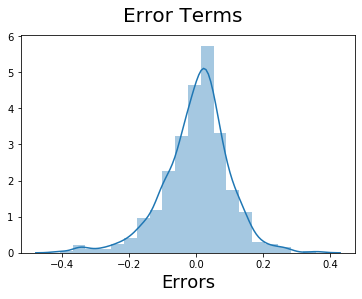

In [49]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [51]:
# making predictions

# applying scaling for testing sets
num_var = ['atemp', 'hum', 'windspeed', 'cnt']
df_test[num_var] = scaler.transform(df_test[num_var])

In [52]:
y_test = df_test.pop('cnt')
X_test = df_test

In [53]:
# creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# adding constant variable 
X_test_new = sm.add_constant(X_test_new)

# making prediction
y_pred = lm.predict(X_test_new)

In [54]:
# model evaluation - to calculate the R-squared score on the test set 
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8016434345922532

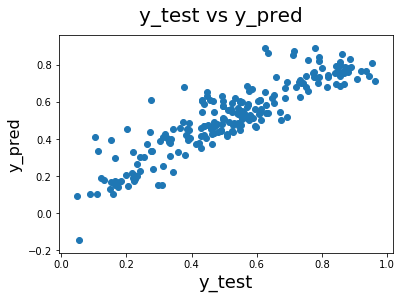

In [56]:
# plotting y_test and y_pred & understanding the spread
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()